# Assignment 2: Joukowski Transformation
## 1. Complex numbers in Python

In [1]:
import numpy
import math
from matplotlib import pyplot

%matplotlib inline
%run ./definitions.ipynb

In [2]:
a = 3
b = 3
z = a + b*1j
print('z = ',z)
print('The type of variable is ',type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


### Exercises:

In [3]:
ans1 = (2.75 + 3.69*1j) * (8.55 - 6.13*1j)
ans2 = 1.4 * numpy.exp(5.32*1j)
ans3 = (7.51 - 9.15*1j)/(4.43 + 9.64*1j)
print('1. ',ans1)
print('2. ',ans2)
print('3. ',ans3)

1.  (46.1322+14.692000000000004j)
2.  (0.799270785858-1.1494199454j)
3.  (-0.4880897698448308-1.0033441577191493j)


## 2. Shapes created by the Joukowski Transform

In [30]:
r = 1
theta = numpy.linspace(0,2*math.pi,100)
z_circ = r*numpy.cos(theta) + r*numpy.sin(theta)*1j

size = 10
pyplot.plot(z_circ.real,z_circ.imag);
pyplot.figure(figsize=size,size)

SyntaxError: positional argument follows keyword argument (<ipython-input-30-1a7571b32554>, line 7)

In [20]:
def joukowski(z,c):
    zeta = z + c**2/z
    
    return zeta

(-1, 1)

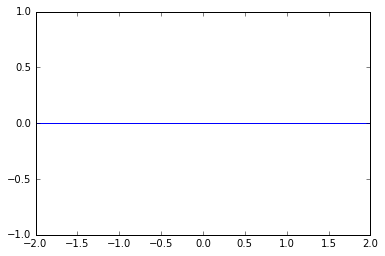

In [22]:
c = 1
zeta = joukowski(z_circ,c)

chi = zeta.real
eta = zeta.imag

pyplot.plot(chi,eta);
pyplot.ylim(-1,1)

(-1, 1)

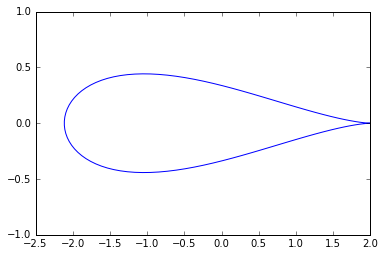

In [27]:
r = 1.2
c = 1
xc = c-r
yc = 0

z_circ = r*numpy.cos(theta) + xc + (r*numpy.sin(theta) + yc)*1j
zeta = joukowski(z_circ,c)

pyplot.plot(zeta.real,zeta.imag)
pyplot.ylim(-1,1)

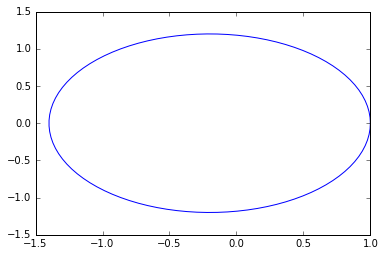

In [28]:
pyplot.plot(z_circ.real,z_circ.imag)